In [ ]:
#Fire Vs No ire
import os
from google.colab import drive


In [ ]:
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!wget https://github.com/sagihaider/CE888_2021/raw/main/Lab_8/data.zip

--2021-04-13 08:11:17--  https://github.com/sagihaider/CE888_2021/raw/main/Lab_8/data.zip
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_8/data.zip [following]
--2021-04-13 08:11:18--  https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_8/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20194537 (19M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  19.26M  44.2MB/s    in 0.4s    

2021-04-13 08:11:20 (44.2 MB/s) - ‘data.zip’ saved [20194537/20194537]



In [ ]:
from zipfile import ZipFile
file_name = "data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
path, dirs, files = next(os.walk("data/cats"))
print(len(files))
path, dirs, files = next(os.walk("data/dogs"))
print(len(files))
path, dirs, files = next(os.walk("data/Humans"))
print(len(files))
path, dirs, files = next(os.walk("data/horses"))
print(len(files))

202
202
202
202


In [ ]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4


In [ ]:
def label_img(img):
    word_label = img.split('.')[0]
    if word_label =='cat': return [1,0,0,0]
    elif word_label == 'dog': return [0,1,0,0]
    elif word_label == 'horse': return [0,0,1,0]
    elif word_label == 'human':return [0,0,0,1]

In [ ]:
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)


In [ ]:
base_dir = "/content/data"

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

FileExistsError: ignored

In [ ]:
original_datasetHum_dir = "/content/data/Humans"
original_datasetCat_dir = "/content/data/cats"
original_datasetDog_dir = "/content/data/dogs"
orifinal_datasetHorse_dir = "/content/data/horses"

In [ ]:
train_dir

'/content/data/train'

In [ ]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1,100)]
for fname in fnames:
    src = os.path.join(original_datasetCat_dir, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(original_datasetCat_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(150, 202)]
for fname in fnames:
    src = os.path.join(original_datasetCat_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1,100)]
for fname in fnames:
    src = os.path.join(original_datasetDog_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(original_datasetDog_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(150, 202)]
for fname in fnames:
    src = os.path.join(original_datasetDog_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['rider-{}.jpg'.format(i) for i in range(1,100)]
for fname in fnames:
    src = os.path.join(original_datasetHum_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(original_datasetHum_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(150, 202)]
for fname in fnames:
    src = os.path.join(original_datasetHum_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['horse-{}.jpg'.format(i) for i in range(1,100)]
for fname in fnames:
    src = os.path.join(orifinal_datasetHorse_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(orifinal_datasetHorse_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(150, 202)]
for fname in fnames:
    src = os.path.join(orifinal_datasetHorse_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)



In [ ]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [ ]:
!rm -rf /content/data/horses

In [ ]:
## VGG 19
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [ ]:
model = VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")

model.summary()


Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
last_layer = model.get_layer('fc2').output
out = Dense(4, activation='sigmoid', name='output')(last_layer)  
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
from keras import optimizers
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg19_model.h5', save_best_only=True),
]


In [ ]:
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)


Epoch 1/10
40/40 [==============================] - 380s 10s/step - loss: 1.6276 - acc: 0.3410 - val_loss: 0.9885 - val_acc: 0.5200
Epoch 2/10
40/40 [==============================] - 384s 10s/step - loss: 0.9825 - acc: 0.5138 - val_loss: 0.9117 - val_acc: 0.6200
Epoch 3/10
40/40 [==============================] - 382s 10s/step - loss: 0.9293 - acc: 0.5767 - val_loss: 0.8298 - val_acc: 0.5550
Epoch 4/10
40/40 [==============================] - 383s 10s/step - loss: 0.8431 - acc: 0.6285 - val_loss: 0.7660 - val_acc: 0.7400
Epoch 5/10
40/40 [==============================] - 378s 10s/step - loss: 0.7932 - acc: 0.6966 - val_loss: 0.7444 - val_acc: 0.6700
Epoch 6/10
40/40 [==============================] - 379s 10s/step - loss: 0.7631 - acc: 0.6527 - val_loss: 0.6759 - val_acc: 0.7600
Epoch 7/10
40/40 [==============================] - 375s 9s/step - loss: 0.7089 - acc: 0.7341 - val_loss: 0.6482 - val_acc: 0.8200
Epoch 8/10
40/40 [==============================] - 377s 9s/step - loss: 0.70

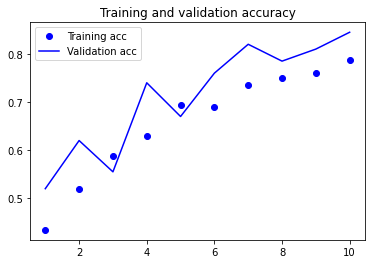

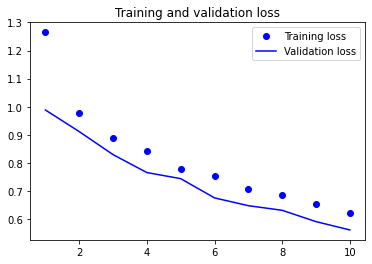

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='macro')

##auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
##print("AUC:\t\t", auc)

ValueError: ignored